In [26]:
import cv2
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from skimage.data import camera
from skimage.filters import frangi, hessian
eye_directory = 'input'
result_directory = 'output'
kernel_ero = np.ones((3,3),np.uint8)
kernel_open = np.ones((11,11),np.uint8)
kernel_dil = np.ones((6,6),np.uint8)
image_number = 5

In [27]:
data = [f for f in listdir(eye_directory)]
mask = [f for f in listdir(result_directory)]

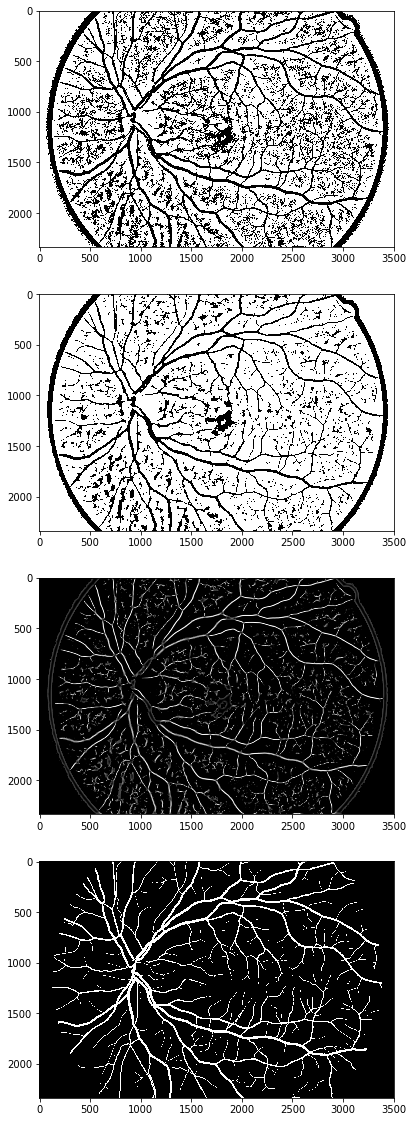

In [31]:

example_image = cv2.imread(eye_directory+'/'+data[image_number])[:,:,1]
mask_image = cv2.imread(result_directory+'/'+mask[image_number])[:,:,1]
example_image = cv2.GaussianBlur(example_image,(3,3),0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))

example_image = clahe.apply(example_image)
example_image = cv2.adaptiveThreshold(example_image,255,cv2.THRESH_BINARY,\
            cv2.THRESH_BINARY,121,3)
plt.subplots(4, figsize=(20,20))
plt.subplot(4,1,1)
plt.imshow(example_image,cmap='gray')
example_image = cv2.dilate(example_image,kernel_dil,iterations = 1)
example_image = cv2.morphologyEx(example_image, cv2.MORPH_OPEN, kernel_open)
example_image = cv2.erode(example_image,kernel_ero,iterations = 1)
example_image = cv2.morphologyEx(example_image, cv2.MORPH_OPEN, kernel_open)
plt.subplot(4,1,2)
plt.imshow(example_image,cmap='gray')
example_image = frangi(example_image)

plt.subplot(4,1,3)
plt.imshow(example_image,cmap='gray')
plt.subplot(4,1,4)
plt.imshow(mask_image,cmap='gray')

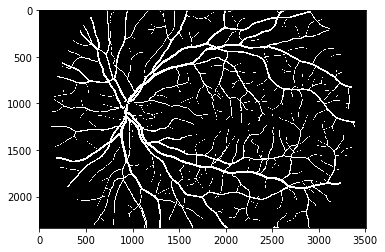